## Review

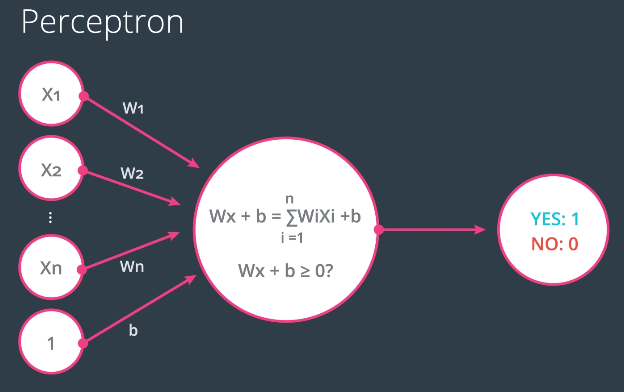

From discrete into a continuous function (using the sigmoid function):

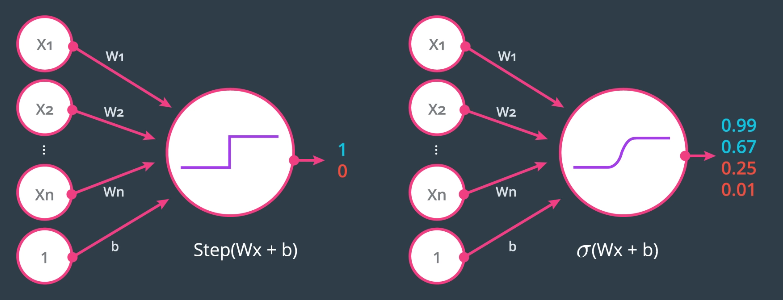

This allows us to use gradient descent to minimize an error function.

## Softmax

Useful for turning classes represented by different numbers into a continuous range of 0-1.

In [1]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    return list(np.divide(np.exp(L), np.sum(np.exp(L))))

print(softmax([1,2,5]))

[0.01714782554552039, 0.04661262257797389, 0.9362395518765058]


## Cross Entropy

A measure of unlikelihood of the results Y with the associated probabilities P.

$ CrossEntropy = - \sum\limits_{i=1}^m y_i ln(p_i) + (1-y_i) ln(1-p_i) $

In [7]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.array(Y)
    P = np.array(P)
    return -np.sum(Y*np.log(P) + (1-Y)*np.log(1-P))

print(cross_entropy([1, 1, 0], [.8, .7, .1]))

0.6851790109107685


### Multi-Class Cross Entropy

A measure of unlikelihood of the results Y with the associated probabilities P, given a certain number of classes M.

$ MultiClassCrossEntropy = - \sum\limits_{i=1}^n \sum\limits_{j=1}^m y_{ij} ln(p_{ij}) $

This becomes the same formula as 2-class cross entropy if M equals 2.

## Logistic Regression

Cross entropy is the error function we can use for logistic regression, except multiplied by $ \frac{1}{m} $ to get the average (by convention) and taken as a function of W and b (the weights of the model):

$ E(W,b) = -\frac{1}{m}\sum\limits_{i=1}^n\sum\limits_{j=1}^m y_{ij} ln(\sigma(Wx^{(i)}+b)) $

### Gradient Descent

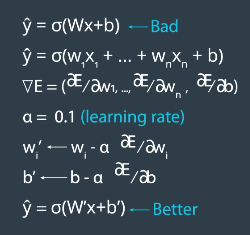



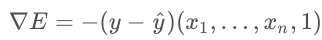

### Gradient Descent Step

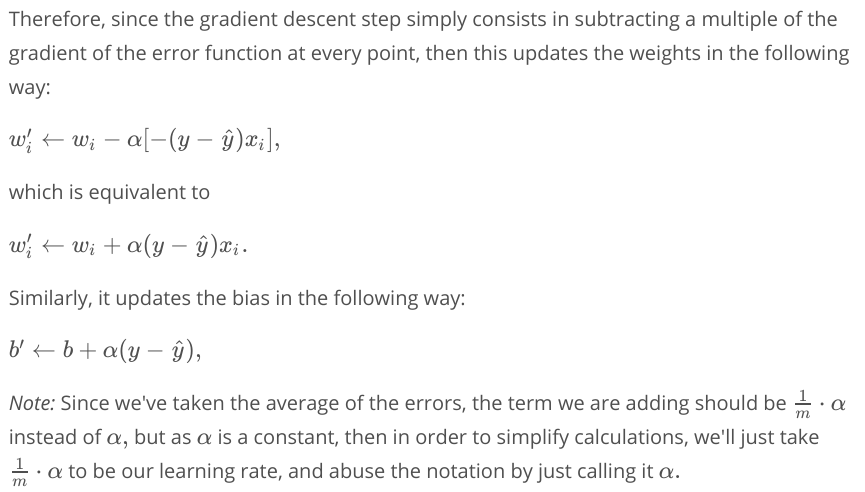

## Neural Networks

(Aka. Multi-Layer Perceptrons)

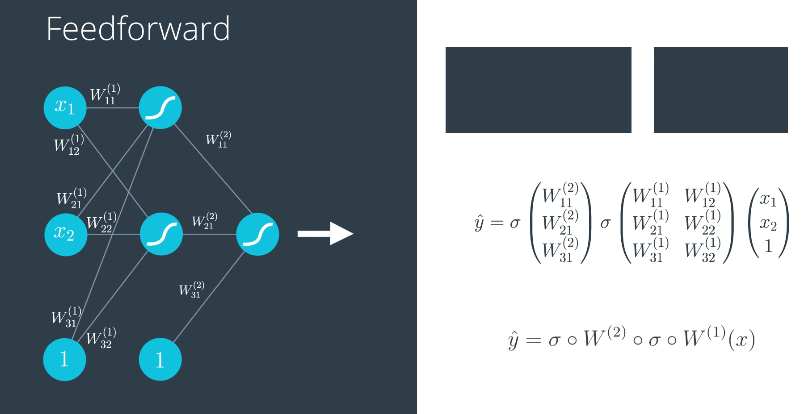

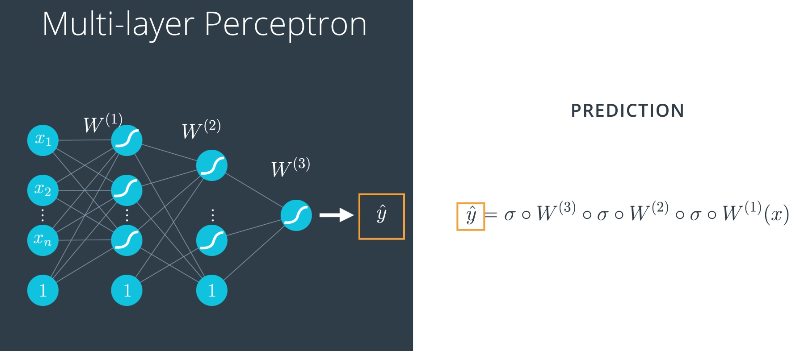

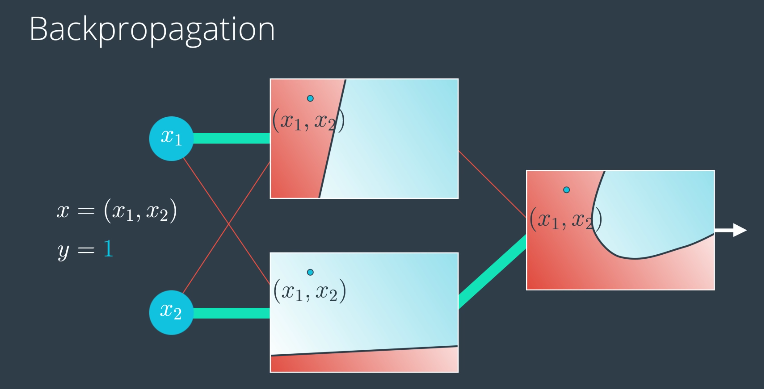

In [1]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consolidated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


## Gradient Descent

In [3]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('admissions_data.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.
def sigmoid_prime(x):
    s = sigmoid(x)
    return s-s**2

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output
        h = np.dot(x, weights)

        # TODO: Calculate the output
        output = sigmoid(h)

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        error_term = error * sigmoid_prime(h)

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / len(targets)

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.2627609384996635
Train loss:  0.20928619409324875
Train loss:  0.20084292908073426
Train loss:  0.19862156475527873
Train loss:  0.1977985139668603
Train loss:  0.19742577912189863
Train loss:  0.1972350774624106
Train loss:  0.1971294562509248
Train loss:  0.19706766341315082
Train loss:  0.19703005801777368
Prediction accuracy: 0.725


## Forward Propagation

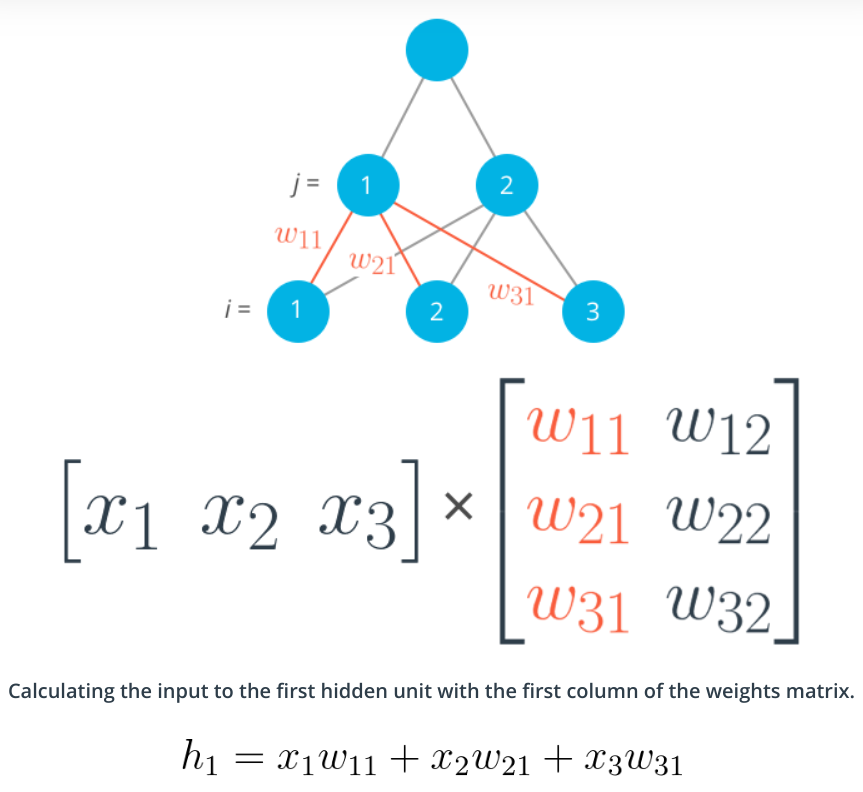

In [10]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

print(X)
print(weights_input_to_hidden)

hidden_layer_in = np.dot(X, weights_input_to_hidden)
print(hidden_layer_in)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

[ 0.49671415 -0.1382643   0.64768854  1.52302986]
[[-0.02341534 -0.0234137   0.15792128]
 [ 0.07674347 -0.04694744  0.054256  ]
 [-0.04634177 -0.04657298  0.02419623]
 [-0.19132802 -0.17249178 -0.05622875]]
[-0.34365494 -0.29801368  0.00097362]
Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]


## Backpropagation

In [12]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1-output)

# TODO: Calculate error term for hidden layer
hidden_error_term = weights_hidden_output * output_error_term * hidden_layer_output * (1-hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:,None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


In [20]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('admissions_data.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
print(weights_input_hidden)
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1-output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = weights_hidden_output * output_error_term
        
        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1-hidden_output)
        
        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights  (don't forget to division by n_records or number of samples)
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

[[-0.02121432 -0.0453956 ]
 [ 0.42531176 -0.51306167]
 [ 0.30430325 -0.69853477]
 [-0.08404378 -0.09576333]
 [ 0.46056288 -0.00515452]
 [-0.25033797  0.56080598]]
Train loss:  0.2513572524259881
Train loss:  0.24996540718842905
Train loss:  0.24862005218904504
Train loss:  0.2473199321717981
Train loss:  0.24606380465584854
Train loss:  0.24485044179257037
Train loss:  0.243678632018683
Train loss:  0.24254718151769472
Train loss:  0.24145491550165454
Train loss:  0.24040067932493334
Prediction accuracy: 0.725


### Additional Resources

https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.vt3ax2kg9

https://www.youtube.com/watch?v=59Hbtz7XgjM

## Training

It is known to be hard to find the correct architecture for a neural network. The most effective strategy for training the neural network is to err on the side of a highly complex model (overfitting) and then implement strategies to reduce overfitting.

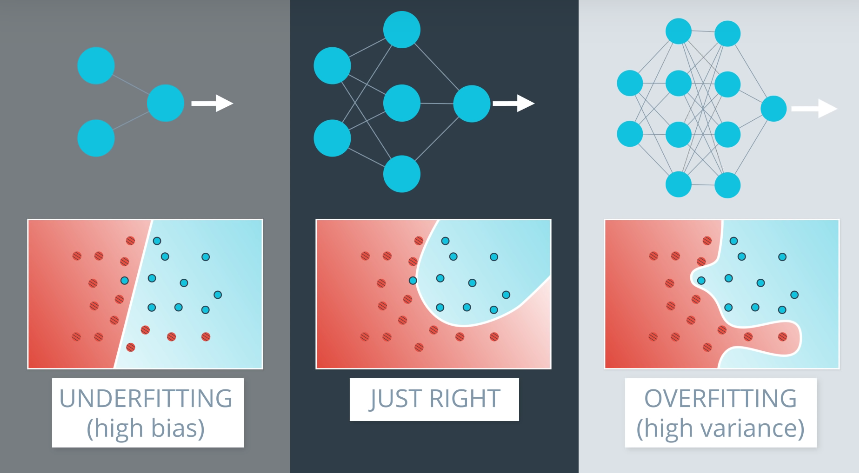

### Early Stopping

Apply gradient descent to adjust the neural network weights until testing error stops decreasing.

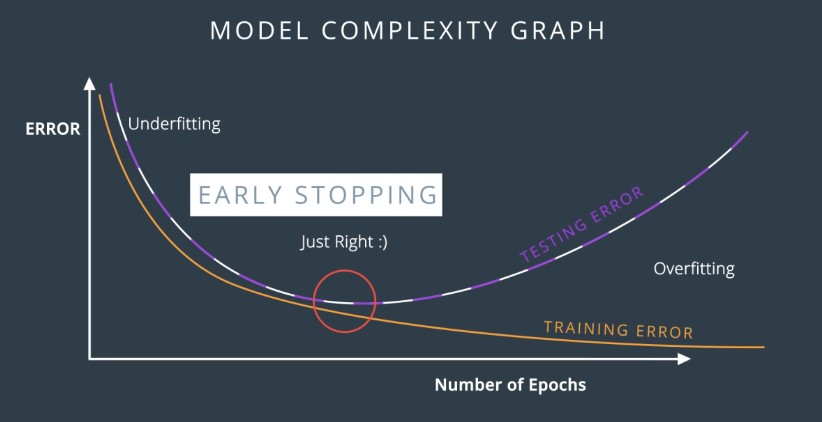

### Regularization

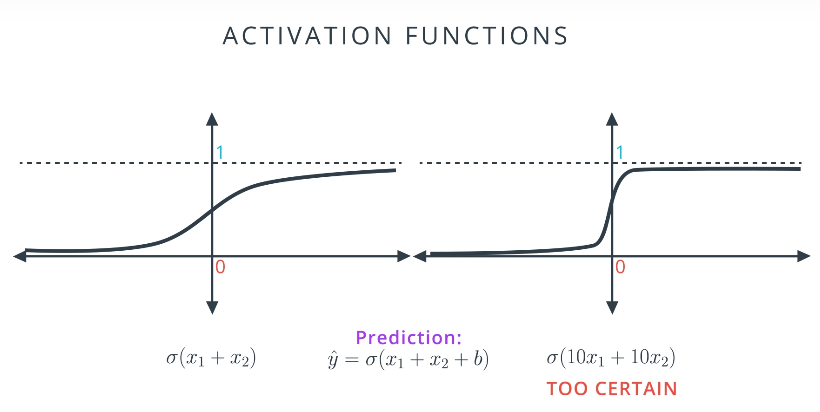

In [19]:
y_hat = lambda x_1, x_2: sigmoid(1*x_1 + 1*x_2 + 0)
y_hat_2 = lambda x_1, x_2: sigmoid(10*x_1 + 10*x_2 + 0)
(1-y_hat(1,1)) + (0-y_hat(-1,-1)), (1-y_hat_2(1,1)) + (0-y_hat_2(-1,-1))

(1.3877787807814457e-16, 7.397754605696881e-17)

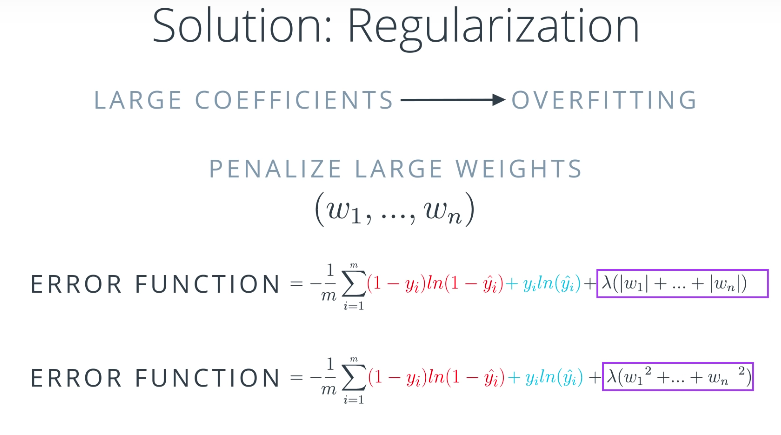

**L1** results in sparse vectors (small weights end up as zero), so is good for feature selection. **L2** does not favor sparse vectors and results in homogeneously small weights, so is typically better for training models.

### Dropout

Randomly switching off nodes in the neural network, to avoid a part of the network getting really large weights that dominates the training. Each node is assigned a probability that it will be turned off during a given epoch.

### Random Restart

Solves the problem of local minima by starting from random places.

### Solving Vanishing Gradient

Other activation functions!

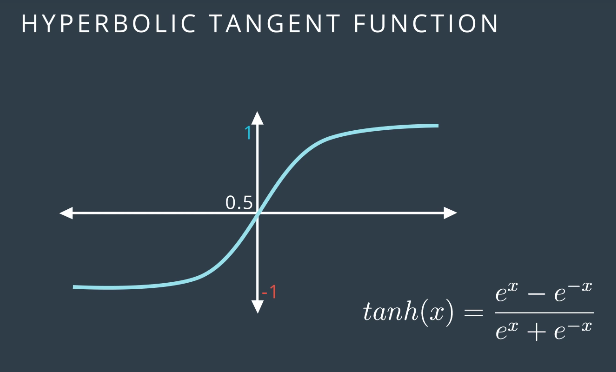

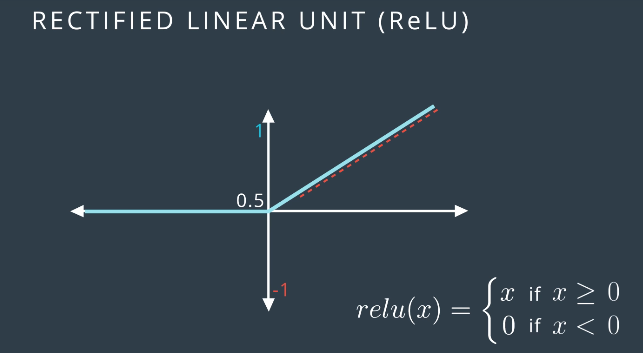

The network is geared towards providing positive predictions. If you use a sigmoid function, it forces the output into the 0-1 range, but a negative output really just means the node being adjusted is not as useful in providing a positive classification.

The output function is defined as a sum of the weighted inputs (and the training data should contain positive outputs), and if most of the node weights are suggesting negative classifications, then the idea is that it's better to define a model based on positive classifications then negative ones, so the error propagation reacts more the better the input features are, so then we don't really care about the change in error for the negative classification nodes.

The derivative ends up being 0 or a constant, depending on the input.

### Momentum

Applying an exponent of a constant $ \beta $ to the previous error steps in order to determine how much to continue past a potential local minimum. Each previous step gets a higher exponent that makes the consideration smaller.